# Visualization using UMAP
## 2/4/21 - new visualization techniques

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
import os
import glob
import math
import statistics
import matplotlib.pyplot as plt
import pickle
import copy
from random import randrange
from sklearn.metrics import jaccard_score
import random

from sklearn.decomposition import PCA #for cluster analysis
import matplotlib.pyplot as plt #for plotting
import os #for importing
import pickle #for loading transcripts
from scipy.stats import pearsonr 

%autosave 5

Autosaving every 5 seconds


<AxesSubplot:>

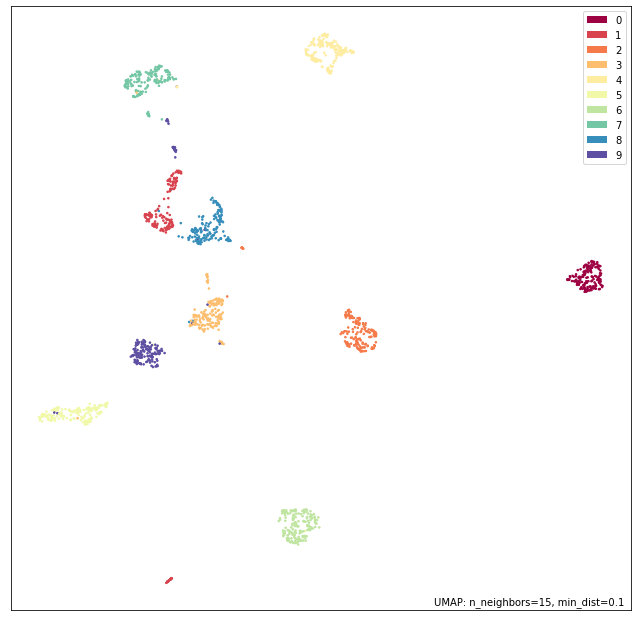

In [2]:
import umap
import umap.plot
from sklearn.datasets import load_digits

digits = load_digits()

mapper = umap.UMAP().fit(digits.data)
umap.plot.points(mapper, labels=digits.target)

# 0. Initializing
## 1. Importing story and template vectors and sums 

In [4]:
templates = pickle.load( open( 'c_template', "rb" ) )
recalls = pickle.load( open( 'c_recall', "rb" ) )
stories = pickle.load( open( 'c_stories', "rb" ) )
keys_ids = pickle.load( open( 'ids_recall', "rb" ) )
# sums
sums = pickle.load( open( "new_sums", "rb" ) )

## 2. Function for normalizing vectors

In [5]:
def norm_300(matrix):
    n, m = matrix.shape
    for i in range(0,n):
        sum_ = 0
        for j in range(0, 300):
            sum_ = matrix[i][j] * matrix[i][j]
        k = math.sqrt(sum_)
        for j in range(0,300):
            matrix[i][j] = matrix[i][j]/k
    return matrix
    

# I. recall + templates visualization
## A. Concatenatating template vectors

## B. Concatenating recalls

In [6]:
# Concatenating template vectors

# Concatenating wvs for plotting below
these_labels = np.zeros((0,1))

wv_dim = 300
wvs_matrix = np.zeros((8, wv_dim))
order_keys = np.zeros((8,1))
count = 0
for key in templates:
    wvs_matrix[count, :] = templates[key]
    order_keys[count] = key
    count += 1
    this_label = key + 1000
    these_labels = np.vstack((these_labels, this_label))

concat_stories = {}

first = 0

keys = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]
ranges = [8]

for key in keys:
    for i in range(0, 3):
        if first == 0:
            cc_stories = recalls[key][i]
            first = 1
        else:
            cc_stories = np.concatenate((cc_stories, recalls[key][i]), axis =0)
        n_partc = recalls[key][i].shape[0]
        for k in range(0,n_partc):
            these_labels = np.vstack((these_labels, key))
    ranges.append((ranges[-1] + sums[key][0]))

## Concatenate templates and recalls
    
all_wv = np.concatenate((wvs_matrix, cc_stories), axis = 0)

## Flatten these_labels
these_labels = these_labels.flatten()

In [7]:
these_labels

array([1010., 1004., 1040., 1003., 1002., 1001., 1020., 1030.,   11.,
         11.,   11.,   11.,   11.,   11.,   11.,   11.,   11.,   11.,
         11.,   11.,   11.,   11.,   11.,   11.,   11.,   11.,   11.,
         11.,   11.,   11.,   11.,   12.,   12.,   12.,   12.,   12.,
         12.,   12.,   12.,   12.,   12.,   12.,   12.,   12.,   12.,
         12.,   12.,   12.,   12.,   12.,   13.,   13.,   13.,   13.,
         13.,   13.,   13.,   13.,   13.,   13.,   13.,   13.,   13.,
         13.,   13.,   13.,   13.,   13.,   13.,   13.,   14.,   14.,
         14.,   14.,   14.,   14.,   14.,   14.,   14.,   14.,   14.,
         14.,   14.,   14.,   14.,   14.,   14.,   14.,   14.,   14.,
         21.,   21.,   21.,   21.,   21.,   21.,   21.,   21.,   21.,
         21.,   21.,   21.,   21.,   21.,   21.,   21.,   21.,   21.,
         21.,   22.,   22.,   22.,   22.,   22.,   22.,   22.,   22.,
         22.,   22.,   22.,   22.,   22.,   22.,   22.,   22.,   22.,
         22.,   22.,

## D. Plot 

<AxesSubplot:>

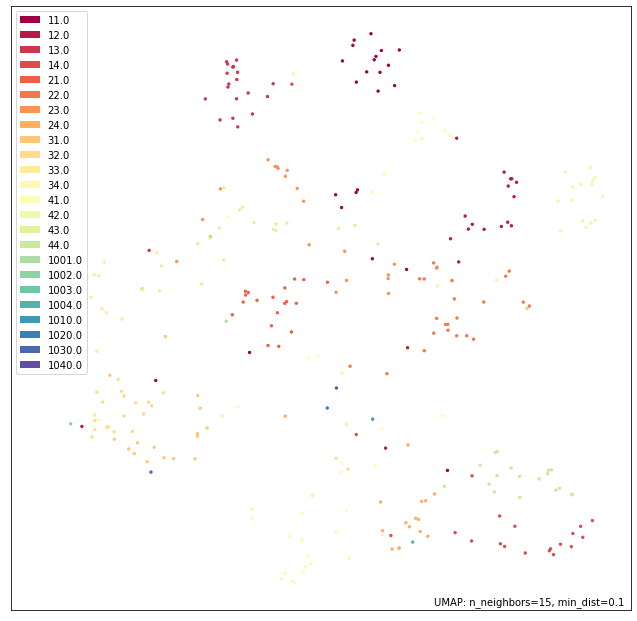

In [8]:
mapper = umap.UMAP().fit(all_wv)
umap.plot.points(mapper, labels=these_labels)

# II. only recall  visualization
## A. concat recalls

In [9]:
these_labels = np.zeros((0,1))

concat_stories = {}

first = 0

keys = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]
ranges = [8]

for key in keys:
    for i in range(0, 3):
        if first == 0:
            cc_stories = recalls[key][i]
            first = 1
        else:
            cc_stories = np.concatenate((cc_stories, recalls[key][i]), axis =0)
        n_partc = recalls[key][i].shape[0]
        for k in range(0,n_partc):
            these_labels = np.vstack((these_labels, key))
    ranges.append((ranges[-1] + sums[key][0]))

## Flatten these_labels
these_labels = these_labels.flatten()

these_labels.shape

(315,)

<AxesSubplot:>

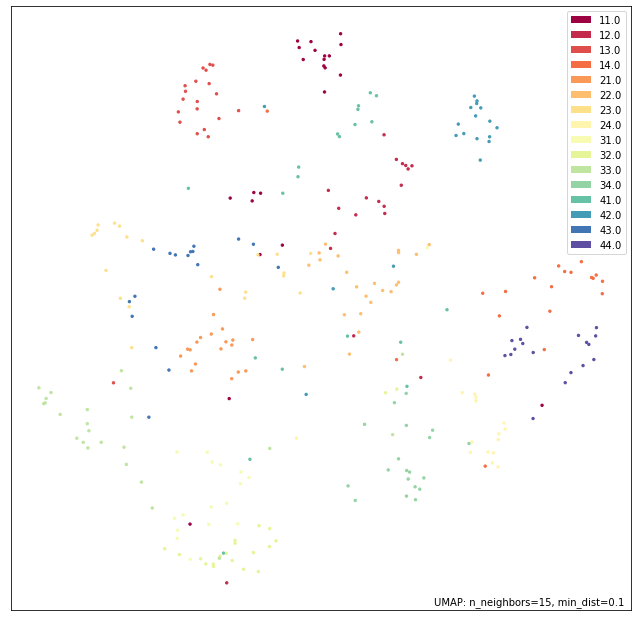

In [10]:
## D. Plot 

mapper = umap.UMAP().fit(cc_stories)
umap.plot.points(mapper, labels=these_labels)

<AxesSubplot:>

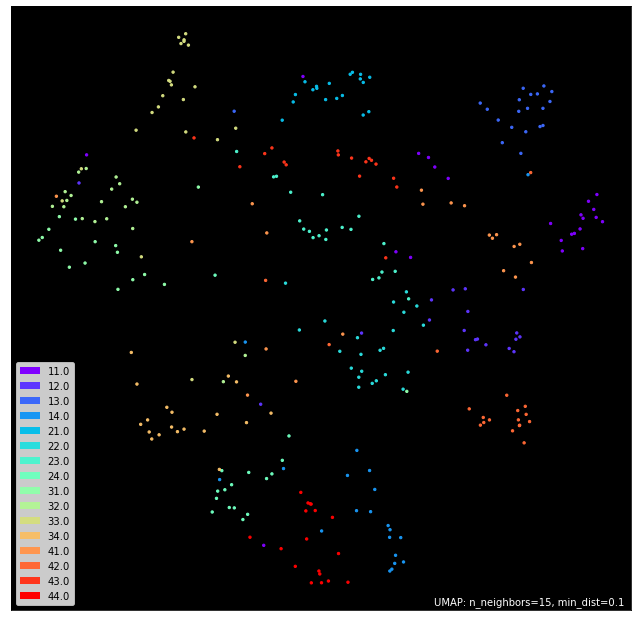

In [11]:
mapper = umap.UMAP().fit(cc_stories)
umap.plot.points(mapper, labels=these_labels, theme = 'fire')

# III. only recall  visualization + normalization
## A. concat recalls

In [12]:
these_labels = np.zeros((0,1))

concat_stories = {}

first = 0

keys = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]
ranges = [8]

for key in keys:
    for i in range(0, 3):
        if first == 0:
            cc_stories = recalls[key][i]
            first = 1
        else:
            cc_stories = np.concatenate((cc_stories, recalls[key][i]), axis =0)
        n_partc = recalls[key][i].shape[0]
        for k in range(0,n_partc):
            these_labels = np.vstack((these_labels, key))
    ranges.append((ranges[-1] + sums[key][0]))

## Flatten these_labels
these_labels = these_labels.flatten()

these_labels.shape


(315,)

## B. Normalize

In [13]:
def norm_300(matrix):
    n, m = matrix.shape
    for i in range(0,n):
        sum_ = 0
        for j in range(0, 300):
            sum_ = matrix[i][j] * matrix[i][j]
        k = math.sqrt(sum_)
        for j in range(0,300):
            matrix[i][j] = matrix[i][j]/k
    return matrix

In [14]:
#normalize all_wv
norm_cc = norm_300(cc_stories)

<AxesSubplot:>

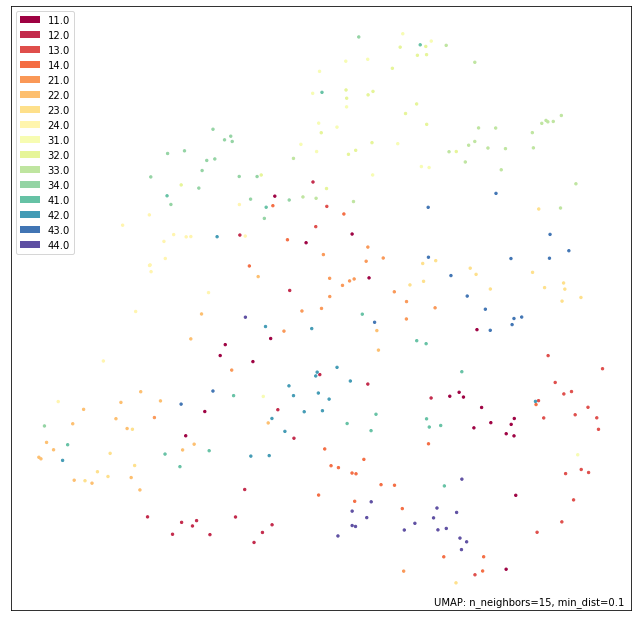

In [15]:
## D. Plot 

mapper = umap.UMAP().fit(norm_cc)
umap.plot.points(mapper, labels=these_labels)

<AxesSubplot:>

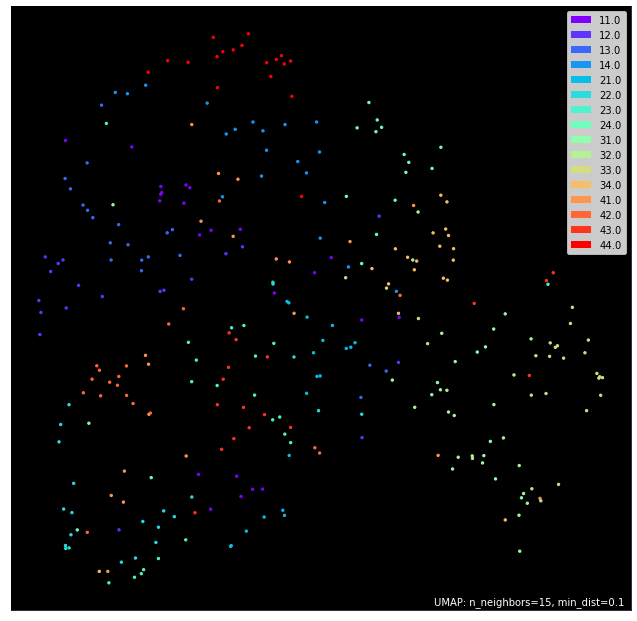

In [16]:
mapper = umap.UMAP().fit(norm_cc)
umap.plot.points(mapper, labels=these_labels, theme = 'fire')

<AxesSubplot:>

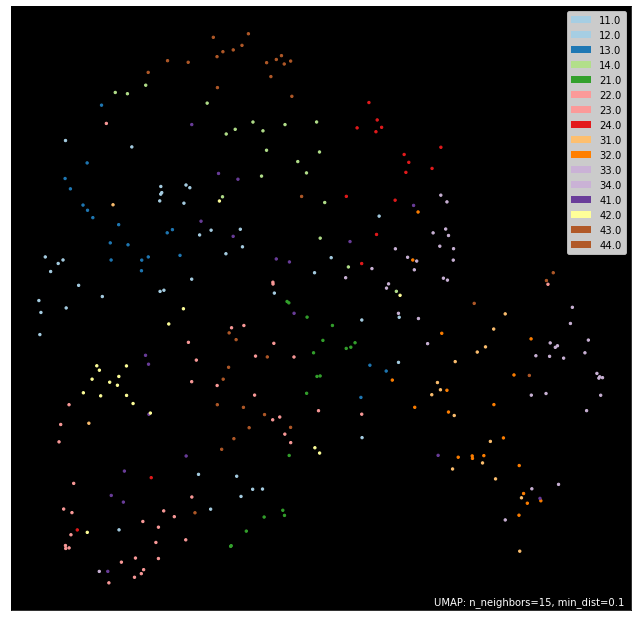

In [17]:
umap.plot.points(mapper, labels=these_labels, color_key_cmap='Paired', background='black')

# IV. only recall  visualization + priming labeling
## A. concat recalls

<AxesSubplot:>

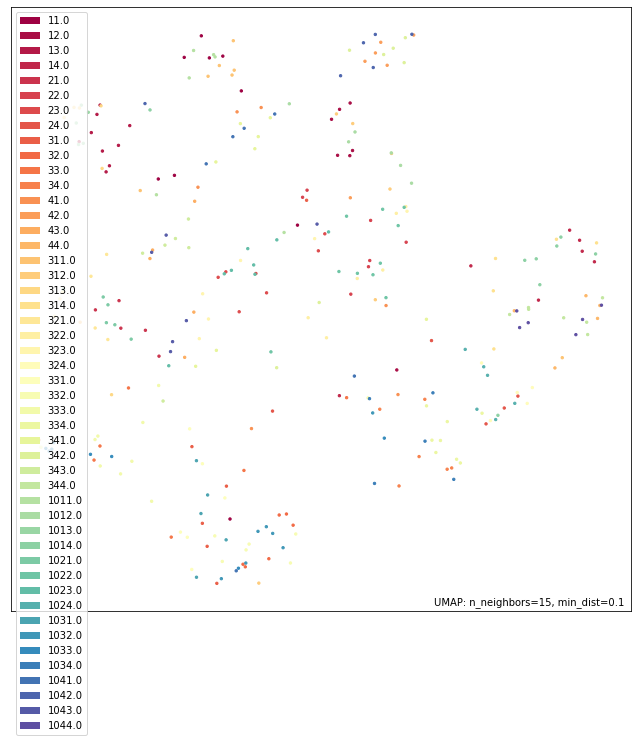

<Figure size 432x288 with 0 Axes>

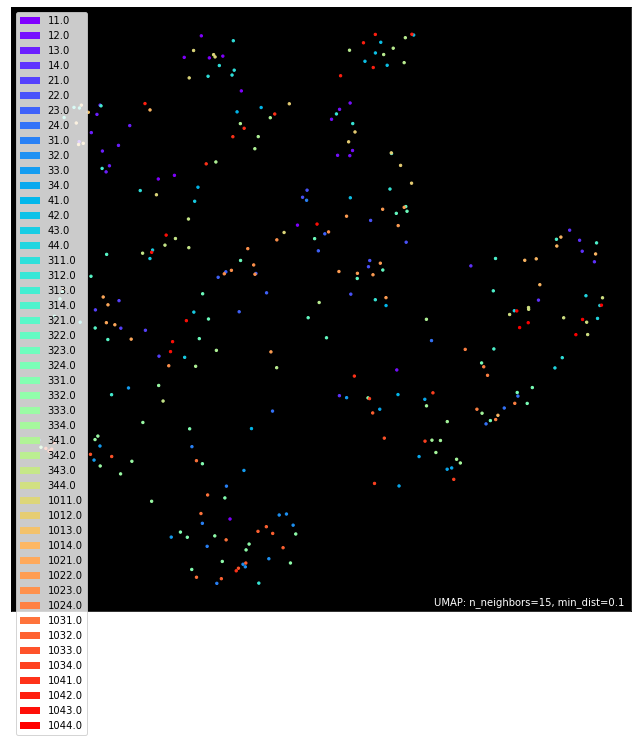

In [18]:
these_labels = np.zeros((0,1))

concat_stories = {}

first = 0

keys = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]
ranges = [8]

add_on = [0, 300, 1000]

for key in keys:
    for i in range(0, 3):
        if first == 0:
            cc_stories = recalls[key][i]
            first = 1
        else:
            cc_stories = np.concatenate((cc_stories, recalls[key][i]), axis =0)
        n_partc = recalls[key][i].shape[0]
        this_label = key + add_on[i]
        for k in range(0,n_partc):
            these_labels = np.vstack((these_labels, this_label))
    ranges.append((ranges[-1] + sums[key][0]))

## Flatten these_labels
these_labels = these_labels.flatten()

these_labels.shape

## D. Plot 

mapper = umap.UMAP().fit(cc_stories)
umap.plot.points(mapper, labels=these_labels)

plt.figure()
umap.plot.points(mapper, labels=these_labels, theme = 'fire')

## What is the best way to label? Within the same story, the colors are very close, yet there is differentiation amongst the priming groups
## solution: decimals

<AxesSubplot:>

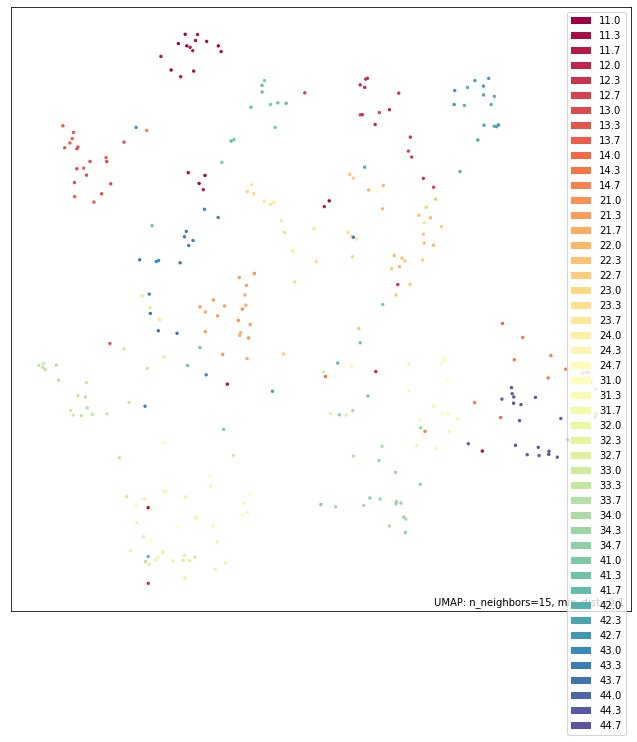

<Figure size 432x288 with 0 Axes>

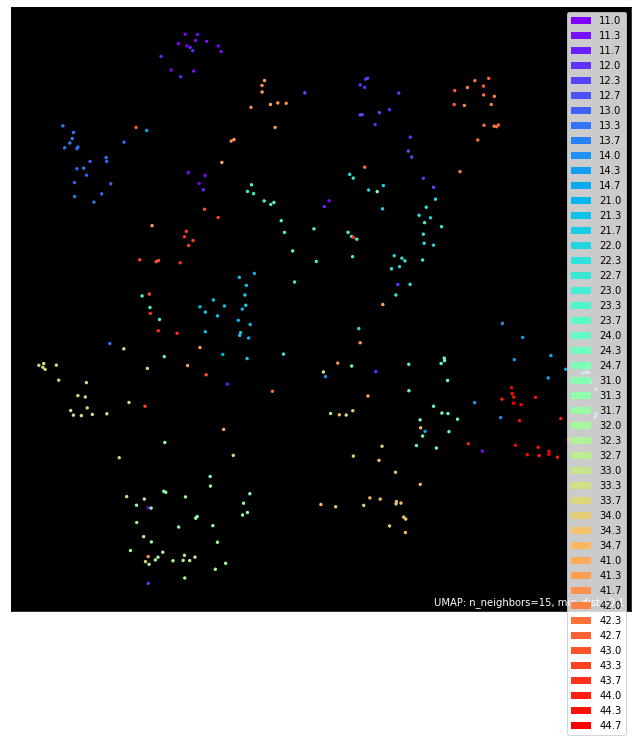

In [19]:
these_labels = np.zeros((0,1))

concat_stories = {}

first = 0

keys = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]
ranges = [8]

add_on = [0, .3, .7]

for key in keys:
    for i in range(0, 3):
        if first == 0:
            cc_stories = recalls[key][i]
            first = 1
        else:
            cc_stories = np.concatenate((cc_stories, recalls[key][i]), axis =0)
        n_partc = recalls[key][i].shape[0]
        this_label = key + add_on[i]
        for k in range(0,n_partc):
            these_labels = np.vstack((these_labels, this_label))
    ranges.append((ranges[-1] + sums[key][0]))

## Flatten these_labels
these_labels = these_labels.flatten()

these_labels.shape

## D. Plot 

mapper = umap.UMAP().fit(cc_stories)
umap.plot.points(mapper, labels=these_labels)

plt.figure()
umap.plot.points(mapper, labels=these_labels, theme = 'fire')

# label based on location schema

[]


Text(0.5, 1.0, 'Recalls organized by location schema')

<Figure size 432x288 with 0 Axes>

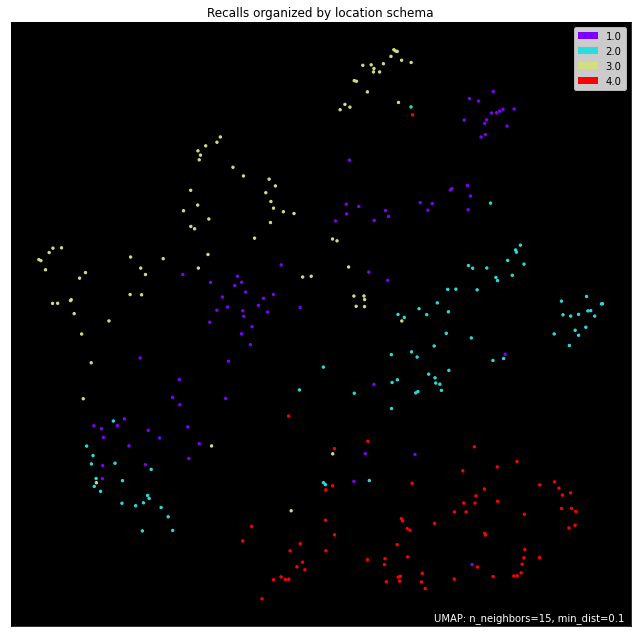

In [24]:
loc_labels = np.zeros((0,1))
soc_labels = np.zeros((0,1))
print(loc_labels)

concat_stories = {}

first = 0

keys = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]
ranges = [8]

for key in keys:
    loc = key%10
    soc = round(key/10)*10
    for i in range(0, 3):
        if first == 0:
            cc_stories = recalls[key][i]
            first = 1
        else:
            cc_stories = np.concatenate((cc_stories, recalls[key][i]), axis =0)
        n_partc = recalls[key][i].shape[0]
        for k in range(0,n_partc):
            loc_labels = np.vstack((loc_labels, loc))
            soc_labels = np.vstack((soc_labels, soc))
    ranges.append((ranges[-1] + sums[key][0]))

## Flatten these_labels
loc_labels = loc_labels.flatten()
soc_labels = soc_labels.flatten()

loc_labels.shape

## D. Plot 
plt.figure()
mapper = umap.UMAP().fit(cc_stories)
umap.plot.points(mapper, labels=loc_labels, theme = 'fire')
plt.title('Recalls organized by location schema')

Text(0.5, 1.0, 'Recalls organized by social schema')

<Figure size 432x288 with 0 Axes>

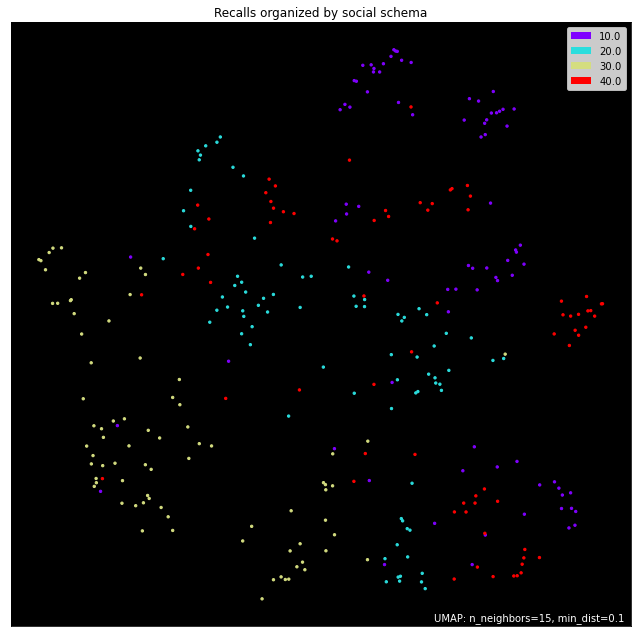

In [25]:
## D. Plot 
plt.figure()
#mapper = umap.UMAP().fit(cc_stories)
umap.plot.points(mapper, labels=soc_labels, theme = 'fire')
plt.title('Recalls organized by social schema')

# iterate through all stories and label based on priming

/Users/alexreblando/opt/anaconda3/envs/firstEnv/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

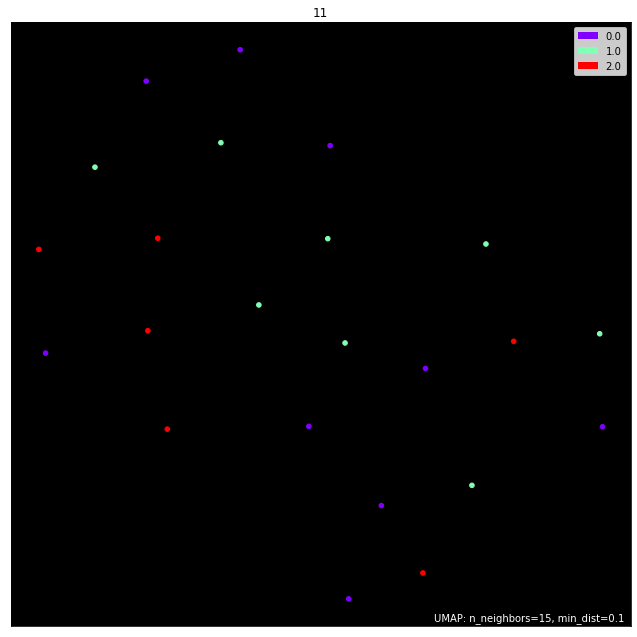

<Figure size 432x288 with 0 Axes>

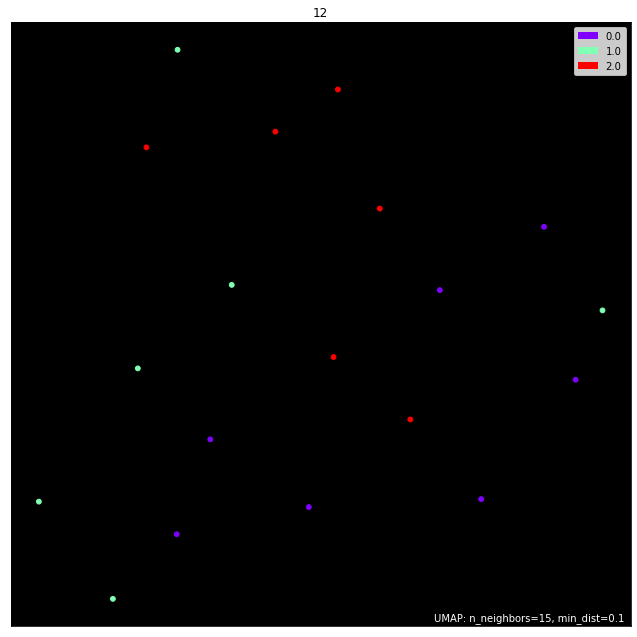

<Figure size 432x288 with 0 Axes>

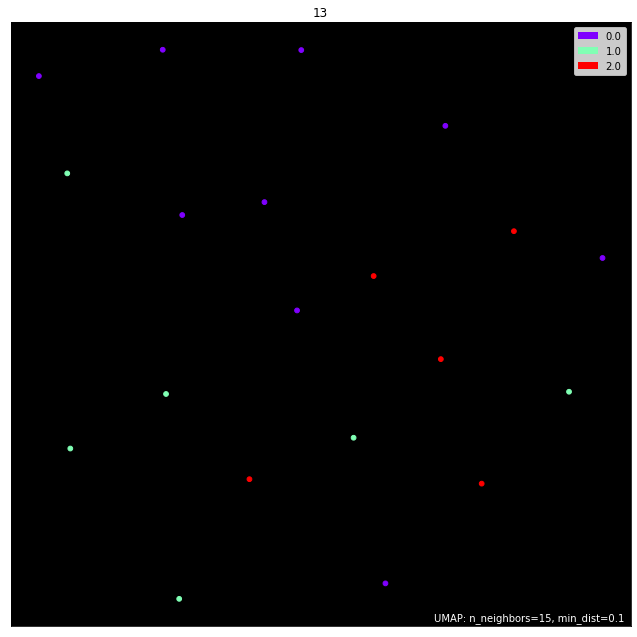

<Figure size 432x288 with 0 Axes>

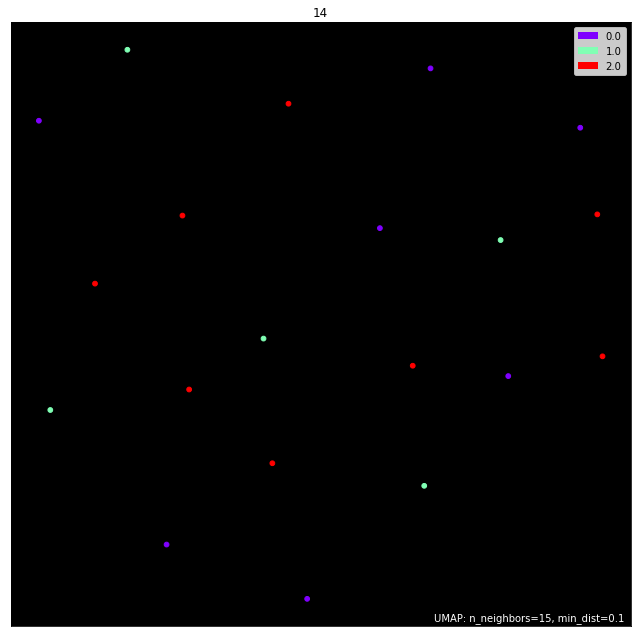

<Figure size 432x288 with 0 Axes>

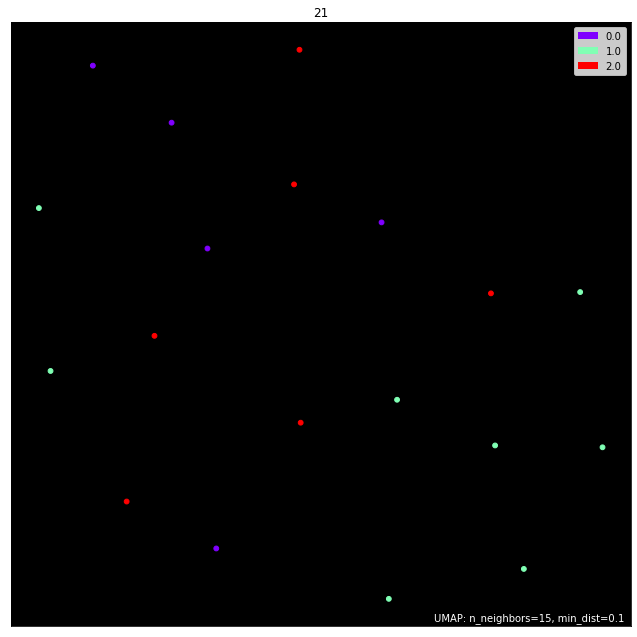

<Figure size 432x288 with 0 Axes>

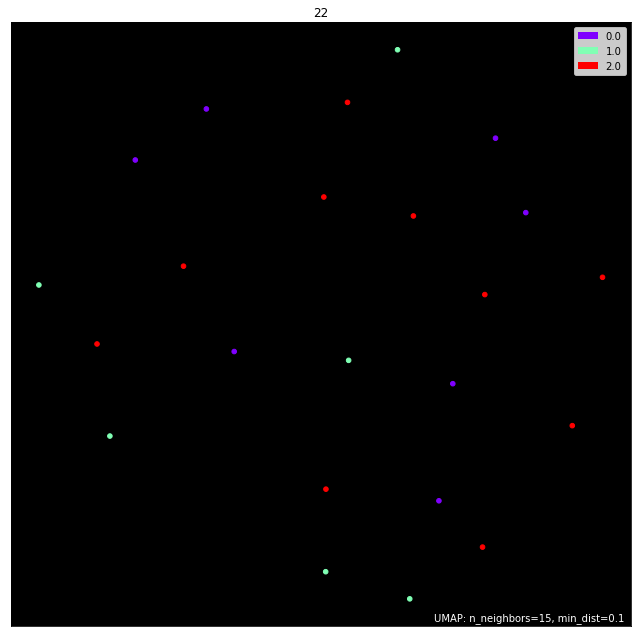

<Figure size 432x288 with 0 Axes>

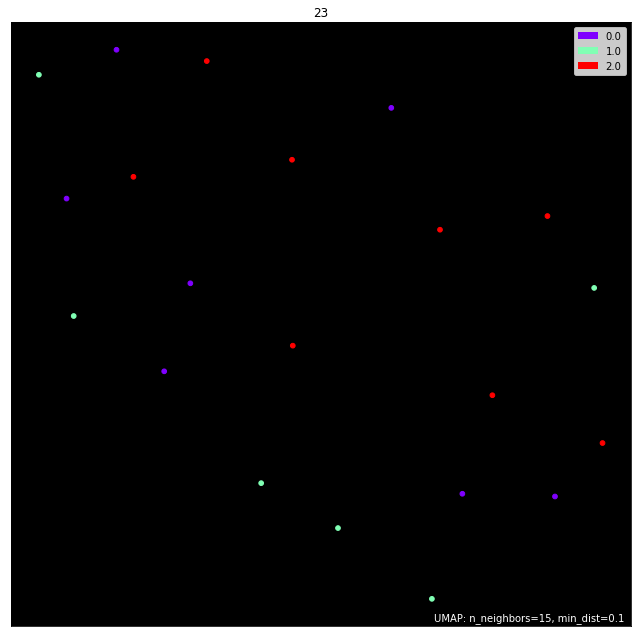

<Figure size 432x288 with 0 Axes>

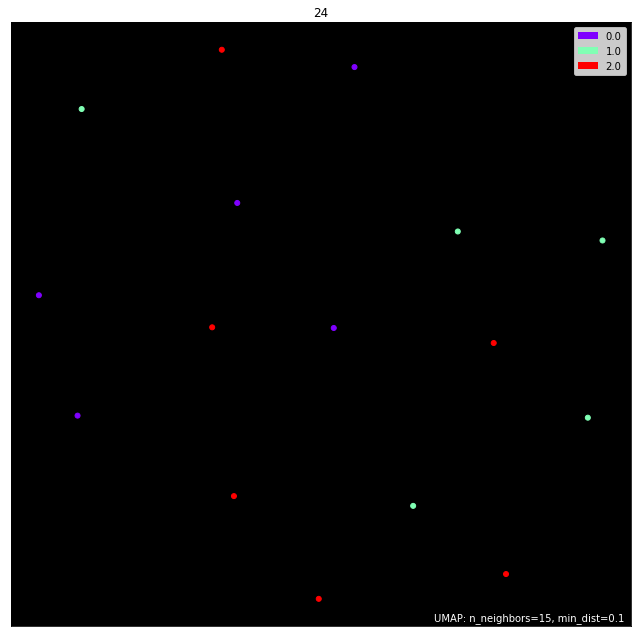

<Figure size 432x288 with 0 Axes>

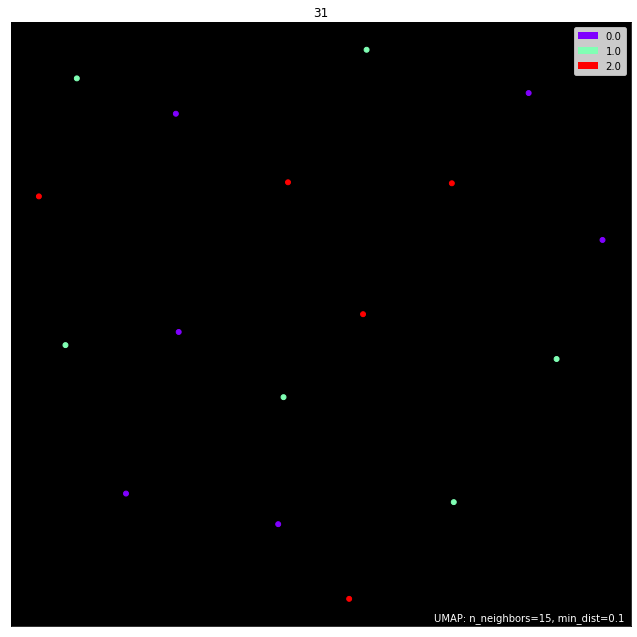

<Figure size 432x288 with 0 Axes>

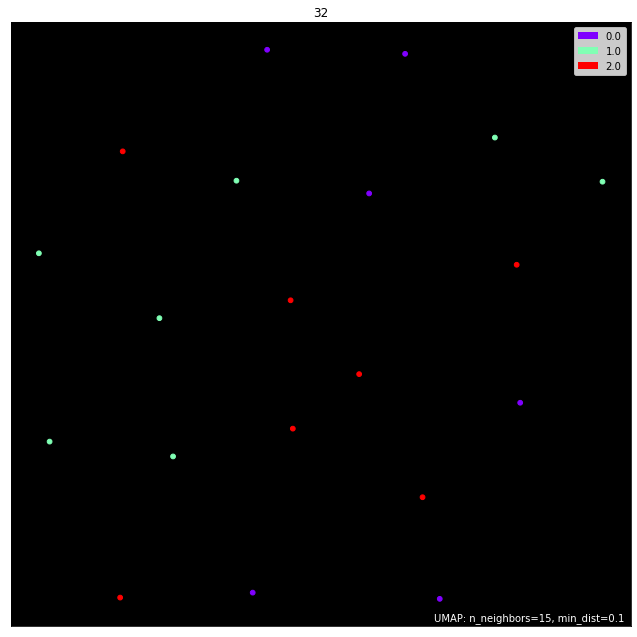

<Figure size 432x288 with 0 Axes>

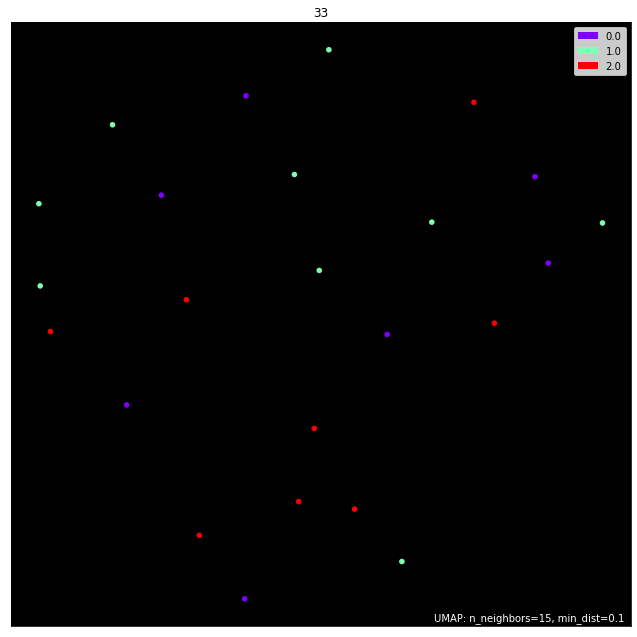

<Figure size 432x288 with 0 Axes>

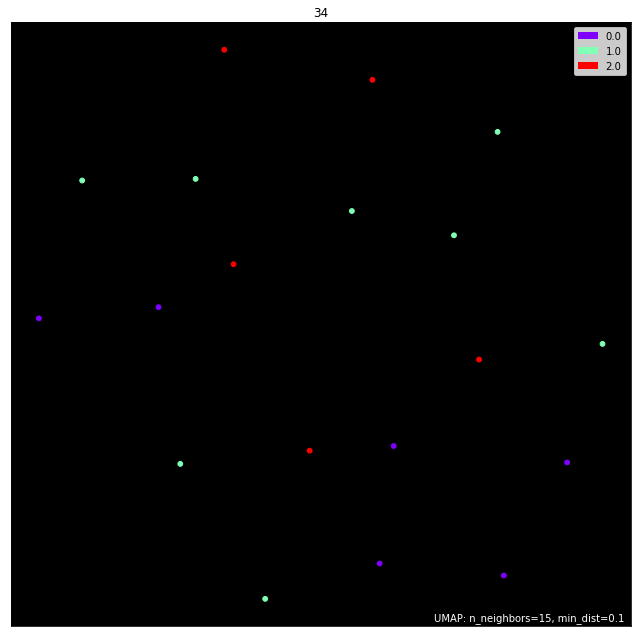

<Figure size 432x288 with 0 Axes>

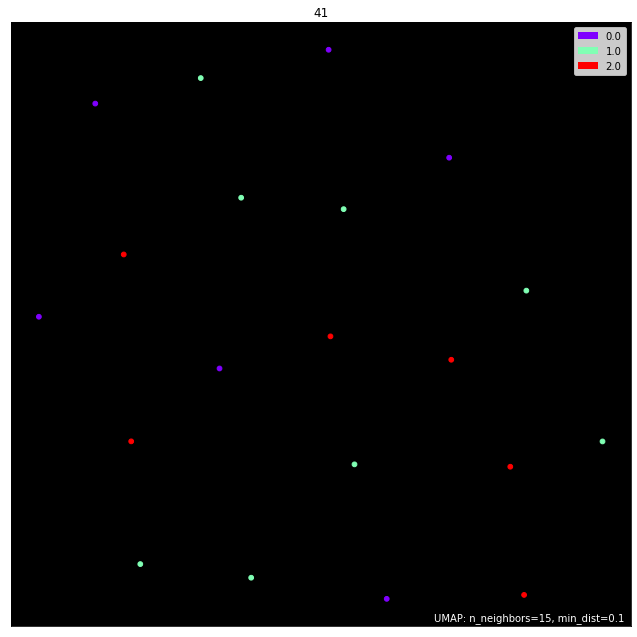

<Figure size 432x288 with 0 Axes>

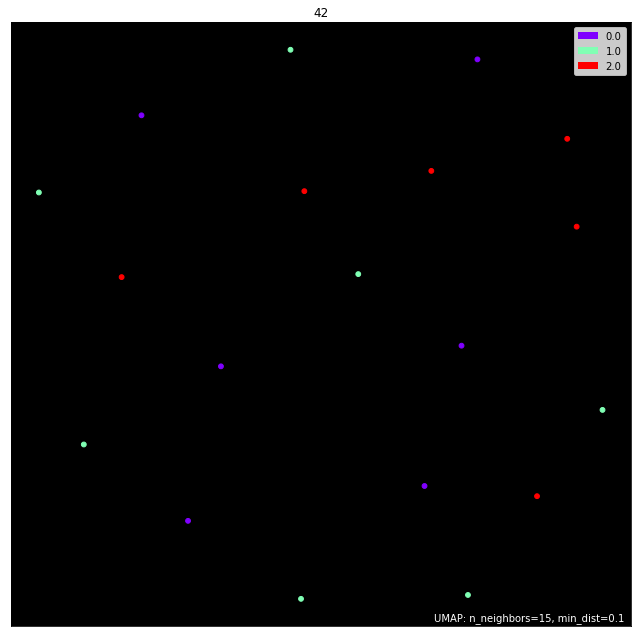

<Figure size 432x288 with 0 Axes>

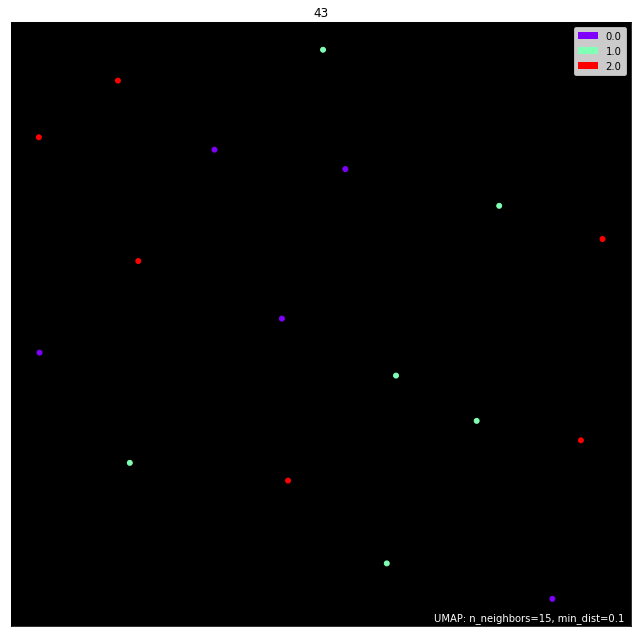

<Figure size 432x288 with 0 Axes>

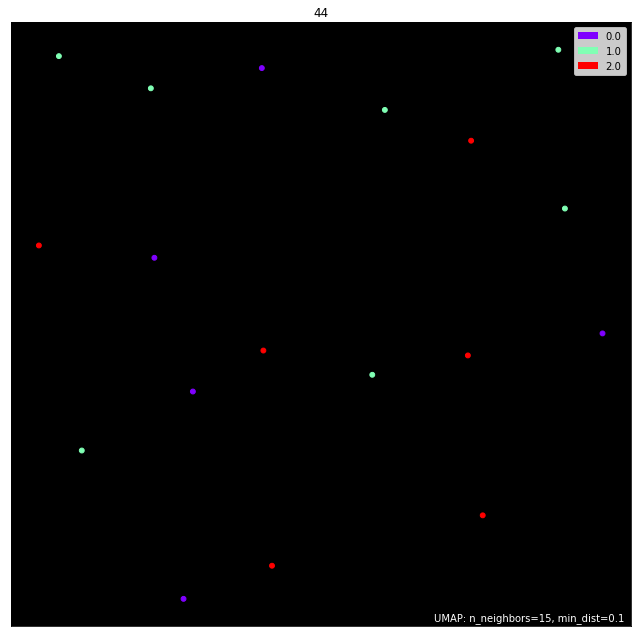

In [45]:
for key in recalls:
    prime_labels = np.zeros((0,1))

    first = 0


    for i in range(0, 3):
        if first == 0:
            cc_stories = recalls[key][i]
            first = 1
        else:
            cc_stories = np.concatenate((cc_stories, recalls[key][i]), axis =0)
        n_partc = recalls[key][i].shape[0]
        for k in range(0,n_partc):
            prime_labels = np.vstack((prime_labels, i))

    ## Flatten these_labels
    prime_labels = prime_labels.flatten()

    ## D. Plot 
    plt.figure()
    mapper = umap.UMAP().fit(cc_stories)
    umap.plot.points(mapper, labels=prime_labels, theme = 'fire')
    plt.title(key)


[]


Text(0.5, 1.0, 'Recalls organized by location schema')

<Figure size 432x288 with 0 Axes>

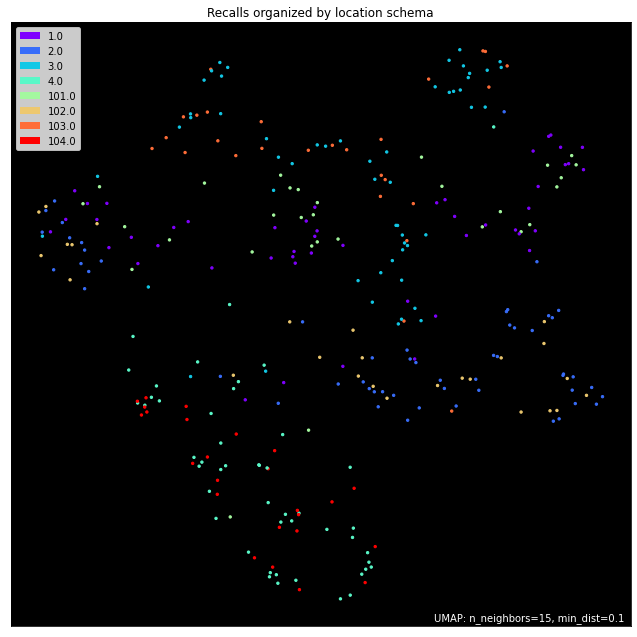

In [53]:
loc_labels = np.zeros((0,1))
soc_labels = np.zeros((0,1))
print(loc_labels)

concat_stories = {}

first = 0

keys = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]
ranges = [8]

for key in keys:
    loc = key%10
    soc = round(key/10)*10
    for i in range(0, 3):
        if first == 0:
            cc_stories = recalls[key][i]
            first = 1
        else:
            cc_stories = np.concatenate((cc_stories, recalls[key][i]), axis =0)
        n_partc = recalls[key][i].shape[0]
        for k in range(0,n_partc):
            if i == 1:
                loc_labels = np.vstack((loc_labels, (loc+100)))
                soc_labels = np.vstack((soc_labels, soc))
            elif i == 2:
                loc_labels = np.vstack((loc_labels, loc))
                soc_labels = np.vstack((soc_labels, (soc+100)))
            else:
                loc_labels = np.vstack((loc_labels, loc))
                soc_labels = np.vstack((soc_labels, soc))
    ranges.append((ranges[-1] + sums[key][0]))

## Flatten these_labels
loc_labels = loc_labels.flatten()
soc_labels = soc_labels.flatten()

loc_labels.shape

## D. Plot 
plt.figure()
mapper = umap.UMAP().fit(cc_stories)
umap.plot.points(mapper, labels=loc_labels, theme = 'fire')
plt.title('Recalls organized by location schema')

Text(0.5, 1.0, 'Recalls organized by location schema')

<Figure size 432x288 with 0 Axes>

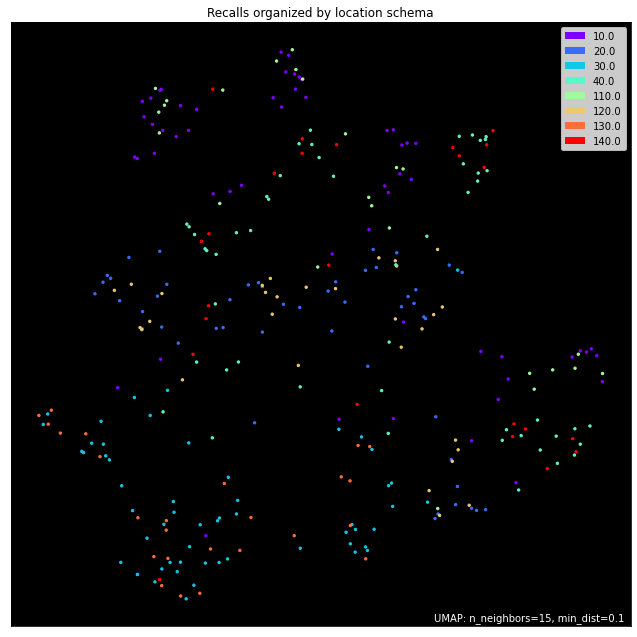

In [54]:
## D. Plot 
plt.figure()
mapper = umap.UMAP().fit(cc_stories)
umap.plot.points(mapper, labels=soc_labels, theme = 'fire')
plt.title('Recalls organized by location schema')